In [5]:
import pandas as pd
# import ast
# import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import re
# import random
# import string
%matplotlib inline


# something a warning told me to do?
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 150)


print("done")

done


In [6]:
import import_func as imp
import tags_work as tgs
import desc_vis as vis
import classifier_func as cls
import classifier_help as clh

def output_plot(outfile):
    fig1 = plt.gcf()
    plt.show()
    plt.draw()
    fig1.savefig(outfile, dpi=100, bbox_inches='tight')

In [7]:
# full_advice = "../data/genre_advice_full_021520.jl"
full_filename = "../data/by_article_fulltext_020920.jl"

# get full text dataset as a df
# advice_df = imp.init_df(full_advice, "full", genre="advice", categories="all")
# advice_df = advice_df[advice_df["year"]<2020]
full_df = imp.init_df(full_filename, "full", categories="all")
# full_df = full_df[full_df["year"]<2020]
print(min(full_df["year"]))
# full_df["probnews"] = np.where(
#         (full_df["advice"] == "no") & (full_df["one_time"] == "no"),
#         "yes",
#         "no",
#     )

# advice_tag_df = full_df[full_df.advice=="yes"]
# wl_tag_df = full_df[full_df.one_time=="yes"]
# news_tag_df = full_df[full_df.probnews=="yes"]

full_df = full_df.drop(
    [
        "date",
        "time",
        "date_seq",
        "column1",
        "column2",
        "one_time",
        "bio",
    ],
    axis=1,
)

print("done")

1998
done


In [67]:
categories = [
    "advice",
    "job market",
    "academic",
    "postdoc",
    "graduate",
    "workplace diversity",
    "midcareer",
    "non-disciplinary",
    "life and career balance",
    "industry",
    "career profiles",
    "government",
    "undergraduate",
    "working life",
    "early career",
    "career-related policy"
        ]
new_categories = []
for cat in categories:
    cat = cat.replace(" ", "_").replace("-", "_")
    new_categories.append(cat)
categories = new_categories
for cat in categories:
    print(cat)

advice
job_market
academic
postdoc
graduate
workplace_diversity
midcareer
non_disciplinary
life_and_career_balance
industry
career_profiles
government
undergraduate
working_life
early_career
career_related_policy


first and second person 

0.012400215336269628
0.011220190477301176


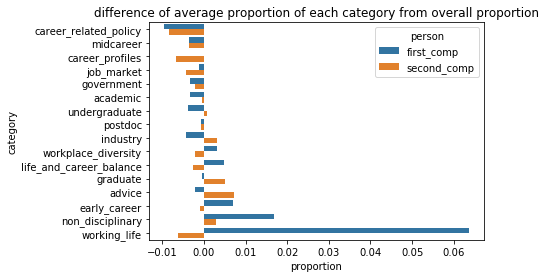

<Figure size 432x288 with 0 Axes>

In [9]:
# averages overall

first_overall = []
second_overall = []

for cat in categories:
    cat_df = full_df[full_df[cat] == "yes"]
    # print(len(cat_df))
    counts_df = clh.pronouns(cat_df)
    # print(len(counts_df))

    counts_df["frac1"] = counts_df["first"]/counts_df["wc"]
    counts_df["frac2"] = counts_df["second"]/counts_df["wc"]

    first = np.mean(counts_df.frac1)
    # print(first)
    second = np.mean(counts_df.frac2)
    # print(second)

    first_overall.append(first)
    second_overall.append(second)

overall = pd.DataFrame({"category":categories,"first":first_overall,"second":second_overall})
# overall["tot"] = overall["first"]+overall["second"]
# overall = overall.sort_values(by="tot")
# overall = overall.drop(["tot"],axis=1)
# overall_long = pd.melt(overall, ["category"],var_name="person",value_name="proportion" )
# # overall_long
# # print(overall_long)

# sns.barplot(y = "category", x = "proportion", hue="person", data=overall_long)

counts_df = clh.pronouns(full_df)

counts_df["frac1"] = counts_df["first"]/counts_df["wc"]
counts_df["frac2"] = counts_df["second"]/counts_df["wc"]

all_overall_first = np.mean(counts_df["frac1"])
all_overall_second = np.mean(counts_df["frac2"])

overall["first_comp"] = overall["first"]-all_overall_first
overall["second_comp"] = overall["second"]-all_overall_second

overall["tot"] = overall["first_comp"]+overall["second_comp"]
overall = overall.sort_values(by="tot")

overall = overall.drop(
    [
        "first",
        "second",
        "tot"
    ],
    axis=1,
)

overall = pd.melt(overall, ["category"],var_name="person",value_name="proportion" )

print(all_overall_first)
print(all_overall_second)

sns.barplot(y = "category", x = "proportion", hue="person", data = overall)
plt.title("difference of average proportion of each category from overall proportion")
output_plot("../figs/comparisons_words_categories/cat_prop_person_barplot.png")

0.012713359780769628


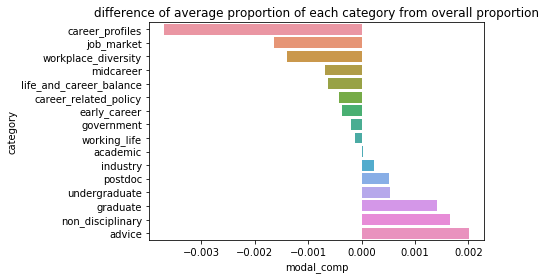

<Figure size 432x288 with 0 Axes>

In [10]:
# averages overall

modal_overall = []

for cat in categories:
    cat_df = full_df[full_df[cat] == "yes"]
    # print(len(cat_df))
    counts_df = clh.modals(cat_df)
    # print(counts_df.head(3))

    counts_df["frac"] = counts_df["modals"]/counts_df["wc"]

    modal = np.mean(counts_df.frac)

    modal_overall.append(modal)

overall = pd.DataFrame({"category":categories,"modal":modal_overall})
# overall = overall.sort_values(by="modal")

# sns.barplot(y = "category", x = "modal", data=overall)

# overall

counts_df = clh.modals(full_df)

counts_df["frac"] = counts_df["modals"]/counts_df["wc"]

all_overall_modal = np.mean(counts_df["frac"])

overall["modal_comp"] = overall["modal"]-all_overall_modal

overall = overall.sort_values(by="modal_comp")

print(all_overall_modal)

sns.barplot(y = "category", x = "modal_comp", data = overall)
plt.title("difference of average proportion of each category from overall proportion")
output_plot("../figs/comparisons_words_categories/cat_prop_modal_barplot.png")

0.0038785150742739025
0.016419930405397656


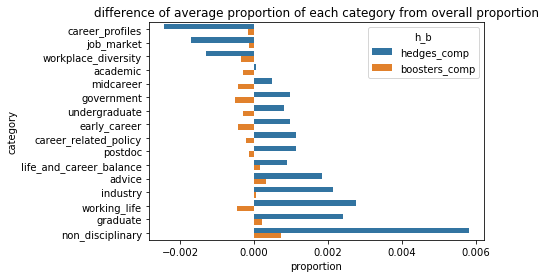

<Figure size 432x288 with 0 Axes>

In [11]:
# averages overall

hedges_overall = []
boosters_overall = []

for cat in categories:
    cat_df = full_df[full_df[cat] == "yes"]
    # print(len(cat_df))
    counts_df_h = clh.hedges(cat_df, hedges="hedges")
    counts_df_b = clh.hedges(cat_df, hedges="boosters")
    # print(counts_df.head(3))

    counts_df_h["frac_h"] = counts_df_h["hedges"]/counts_df_h["wc"]
    counts_df_b["frac_b"] = counts_df_b["boosters"]/counts_df_b["wc"]

    hedges = np.mean(counts_df_h.frac_h)
    boosters = np.mean(counts_df_b.frac_b)

    # print(first)
    # print(second)

    hedges_overall.append(hedges)
    boosters_overall.append(boosters)


overall = pd.DataFrame({"category":categories,"hedges":hedges_overall, "boosters":boosters_overall})
# overall["tot"] = overall["hedges"]+overall["boosters"]
# overall = overall.sort_values(by="tot")
# overall = overall.drop(["tot"],axis=1)
# overall_long = pd.melt(overall, ["category"],var_name="h_b",value_name="proportion" )

# sns.barplot(y = "category", x = "proportion", hue = "h_b", data=overall_long)

# overall

counts_df_h = clh.hedges(full_df, hedges="hedges")
counts_df_b = clh.hedges(full_df, hedges="boosters")

counts_df_h["frac_h"] = counts_df_h["hedges"]/counts_df_h["wc"]
counts_df_b["frac_b"] = counts_df_b["boosters"]/counts_df_b["wc"]

all_overall_hedges = np.mean(counts_df_h["frac_h"])
all_overall_boosters = np.mean(counts_df_b["frac_b"])

overall["hedges_comp"] = overall["hedges"]-all_overall_hedges
overall["boosters_comp"] = overall["boosters"]-all_overall_boosters

overall["tot"] = overall["hedges_comp"]+overall["boosters_comp"]
overall = overall.sort_values(by="tot")

overall = overall.drop(
    [
        "hedges",
        "boosters",
        "tot"
    ],
    axis=1,
)

overall_long = pd.melt(overall, ["category"],var_name="h_b",value_name="proportion" )

print(all_overall_boosters)
print(all_overall_hedges)

sns.barplot(y = "category", x = "proportion", hue = "h_b", data = overall_long)
plt.title("difference of average proportion of each category from overall proportion")
output_plot("../figs/comparisons_words_categories/cat_prop__hedges_barplot.png")

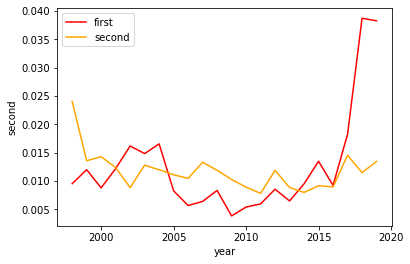

In [12]:
# overall 
counts_df = clh.pronouns(full_df)

counts_df["frac1"] = counts_df["first"]/counts_df["wc"]
counts_df["frac2"] = counts_df["second"]/counts_df["wc"]

counts_df["first"] = counts_df["frac1"]
counts_df["second"] = counts_df["frac2"]

counts_plot_df = counts_df.groupby("year").mean()

full_counts_person_plot_df = counts_plot_df.reset_index()
# counts_plot_df = counts_plot_df.reset_index()
# counts_df.head()

sns.lineplot(x = "year", y = "first", color = "red", label="first", data=full_counts_person_plot_df)
sns.lineplot(x = "year", y = "second", color = "orange", label="second", data=full_counts_person_plot_df)

plt.savefig("../figs/person_all.png")

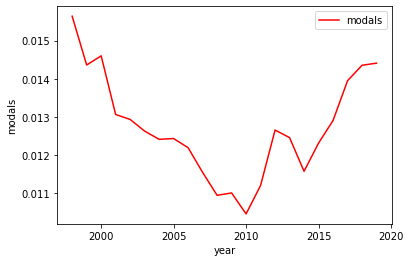

In [13]:
# overall 
counts_df = clh.modals(full_df)

counts_df["frac1"] = counts_df["modals"]/counts_df["wc"]

counts_df["modals"] = counts_df["frac1"]

counts_plot_df = counts_df.groupby("year").mean()

full_counts_modal_plot_df = counts_plot_df.reset_index()

sns.lineplot(x = "year", y = "modals", color = "red", label="modals", data=full_counts_modal_plot_df)

plt.savefig("../figs/person_all.png")

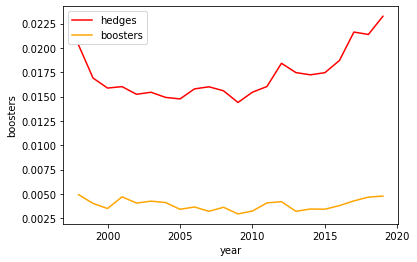

In [14]:
# overall 
counts_df_h = clh.hedges(full_df, hedges="hedges")
counts_df_b = clh.hedges(full_df, hedges="boosters")

counts_df_h["frac1"] = counts_df_h["hedges"]/counts_df_h["wc"]
counts_df_b["frac2"] = counts_df_b["boosters"]/counts_df_b["wc"]

counts_df_h["hedges"] = counts_df_h["frac1"]
counts_df_b["boosters"] = counts_df_b["frac2"]

counts_plot_h_df = counts_df_h.groupby("year").mean()
counts_plot_b_df = counts_df_b.groupby("year").mean()

full_counts_h_plot_df = counts_plot_h_df.reset_index()
full_counts_b_plot_df = counts_plot_b_df.reset_index()

sns.lineplot(x = "year", y = "hedges", color = "red", label="hedges", data=full_counts_h_plot_df)
sns.lineplot(x = "year", y = "boosters", color = "orange", label="boosters", data=full_counts_b_plot_df)

plt.savefig("../figs/hedges_boosters_all.png")

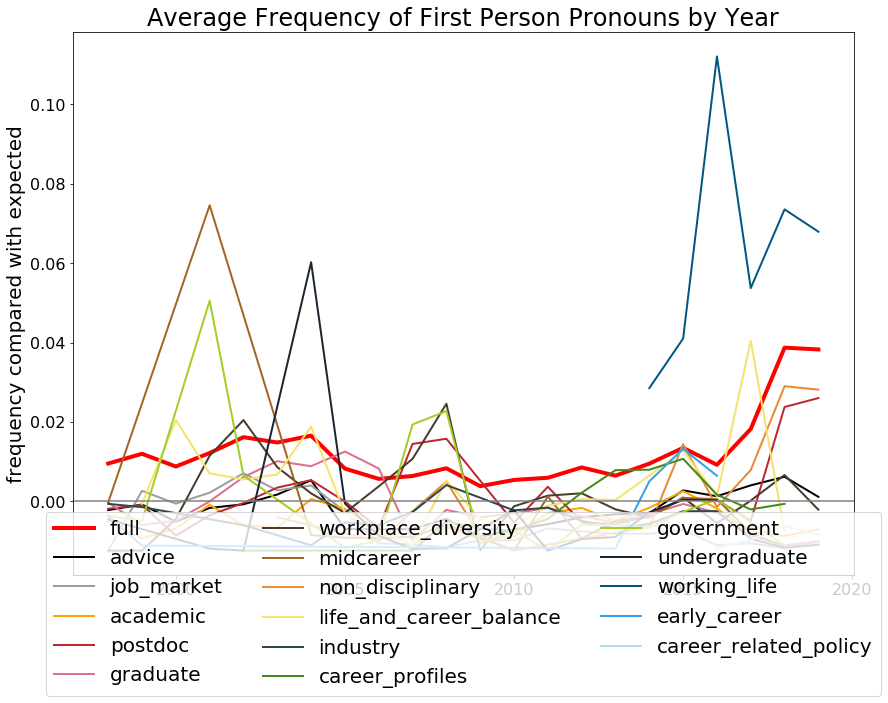

<Figure size 432x288 with 0 Axes>

In [15]:
plt.figure(figsize=(14, 10))

# colors = ["black","green","orange","blue","purple","yellow"]
colors = [
    "#000000",
    "#9D9D9D",
    "orange",
    "#BE2633",
    "#E06F8B",
    "#493C2B",
    "#A46422",
    "#EB8931",
    "#F7E26B",
    "#2F484E",
    "#44891A",
    "#A3CE27",
    "#1B2632",
    "#005784",
    "#31A2F2",
    "#B2DCEF"
]


def average_frequency_plot(full_df,full_plot,categories,colors,function,all_overall):
    sns.lineplot(x = "year", y = function, color = "red", label="full", linewidth=4, data=full_plot)

    count=0

    for cat in categories:
        cat_df = full_df[full_df[cat] == "yes"]
            # print(categories[count])
        if function in ["first", "second"]:
            counts_df = clh.pronouns(cat_df)
        elif function == "modals":
            counts_df = clh.modals(cat_df)
        elif function == "hedges":
            counts_df = clh.hedges(cat_df, hedges="hedges")
        elif function == "boosters":
            counts_df = clh.hedges(cat_df,hedges="boosters")
        else:
            print("acceptable function arguments are: first, second, modals, hedges, boosters")

        # remove datapoints that have been derived from fewer than 5 articles
        # to do

        counts_df["frac"] = counts_df[function]/counts_df["wc"]-all_overall

        counts_plot_df = counts_df.groupby("year").mean()
        counts_plot_df = counts_plot_df.reset_index()

        # if cat in ["midcareer", "government","industry"]:
        #     print(cat)
        #     print(counts_plot_df)

        sns.lineplot(x = "year", y = "frac", color = colors[count], legend="full", label=categories[count], linewidth=2, data = counts_plot_df)
        # sns.lineplot(x = "year", y = "frac1", color = "red", label="first", data=full_counts_plot_df)

        count+=1

average_frequency_plot(full_df=full_df, full_plot=full_counts_person_plot_df, categories=categories, colors=colors, function="first", all_overall=all_overall_first)

plt.axhline(y=0, color="gray")
plt.title("Average Frequency of First Person Pronouns by Year", fontsize=24)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.24), ncol=3, fontsize=20)
plt.xlabel('')
plt.ylabel('frequency compared with expected', fontsize=20)
plt.tick_params(labelsize=16)
output_plot("../figs/person_first_all_category.png")
# plt.savefig("../figs/person_first_all_category.png")

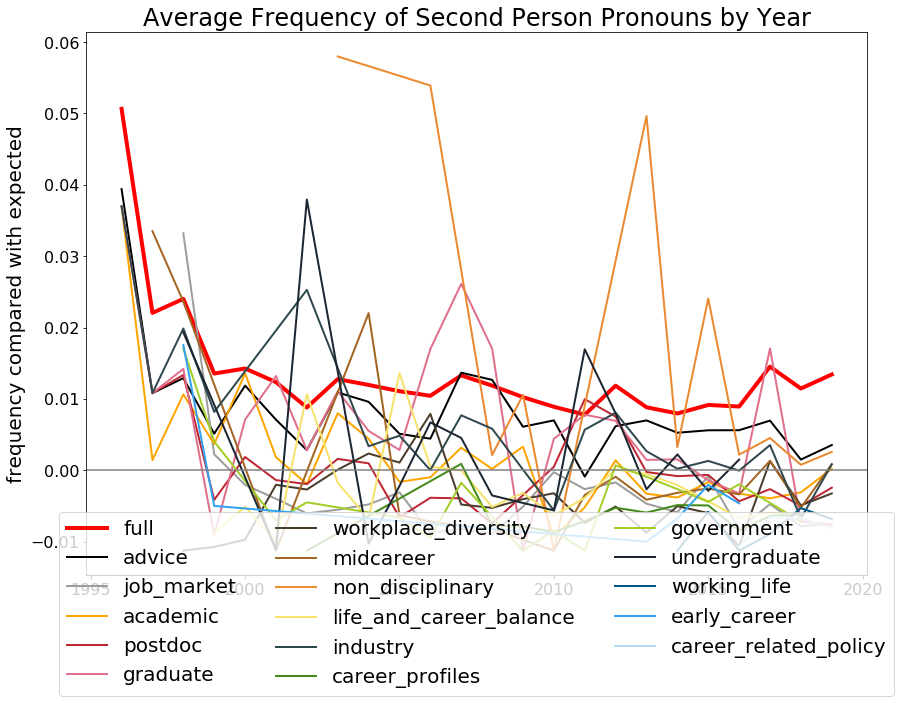

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize=(14, 10))

average_frequency_plot(full_df=full_df, full_plot=full_counts_person_plot_df, categories=categories, colors=colors, function="second", all_overall=all_overall_second)

plt.axhline(y=0, color="gray")
plt.title("Average Frequency of Second Person Pronouns by Year", fontsize=24)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.24), ncol=3, fontsize=20)
plt.xlabel('')
plt.ylabel('frequency compared with expected', fontsize=20)
plt.tick_params(labelsize=16)
output_plot("../figs/person_second_all_category.png")
# plt.savefig("../figs/person_first_all_category.png")

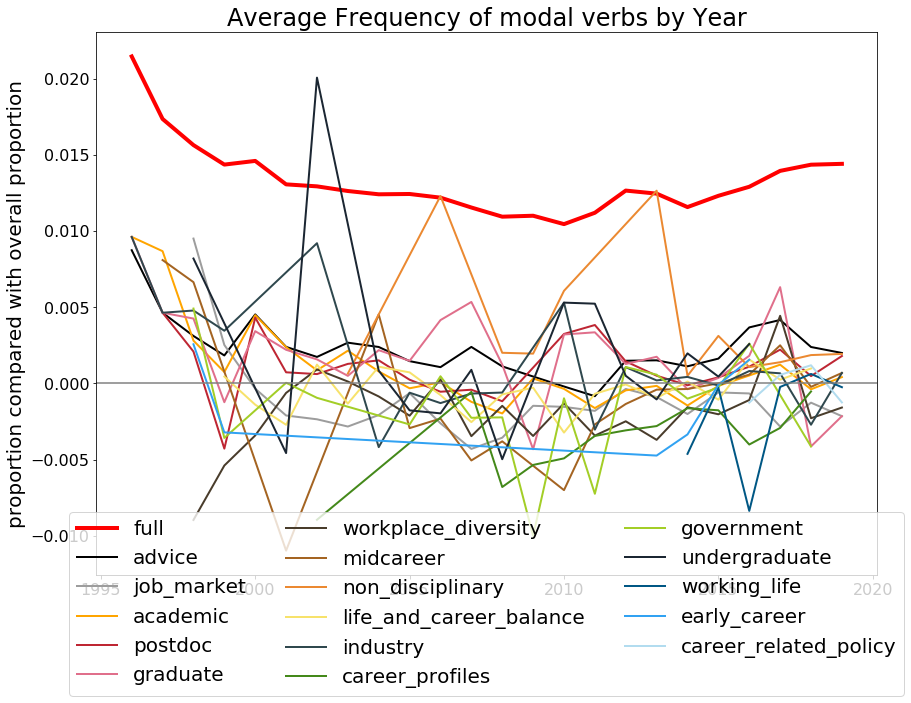

<Figure size 432x288 with 0 Axes>

In [37]:
plt.figure(figsize=(14, 10))

average_frequency_plot(full_df=full_df, full_plot=full_counts_modal_plot_df, categories=categories, colors=colors, function="modals", all_overall=all_overall_modal)

plt.axhline(y=0, color="gray")
plt.title("Average Frequency of modal verbs by Year", fontsize=24)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.24), ncol=3, fontsize=20)
plt.xlabel('')
plt.ylabel('proportion compared with overall proportion', fontsize=20)
plt.tick_params(labelsize=16)
output_plot("../figs/person_second_all_category.png")
# plt.savefig("../figs/person_first_all_category.png")

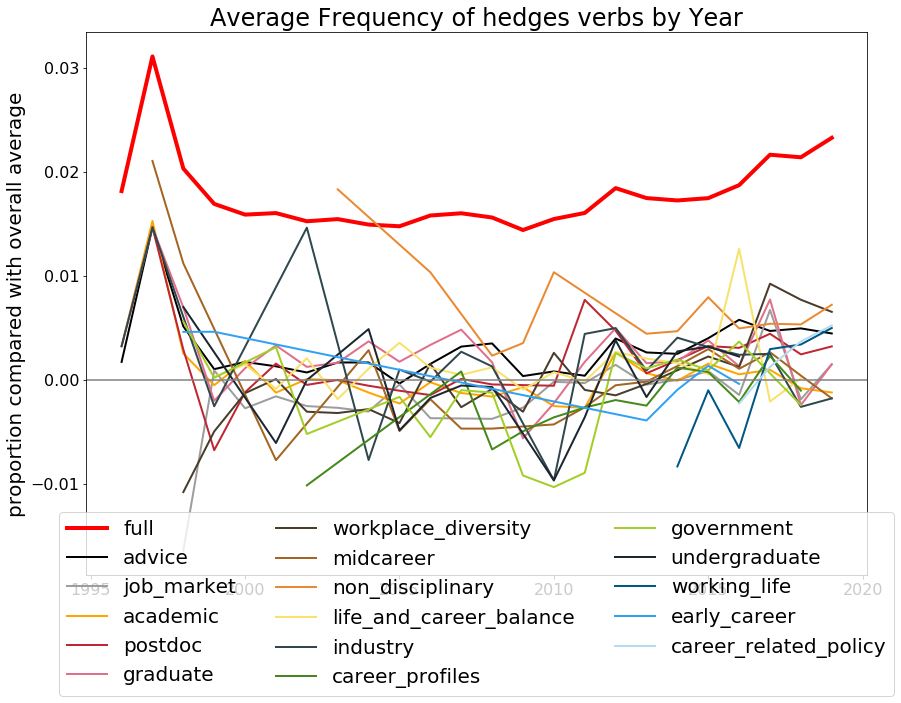

<Figure size 432x288 with 0 Axes>

In [38]:
plt.figure(figsize=(14, 10))

average_frequency_plot(full_df=full_df, full_plot=full_counts_h_plot_df, categories=categories, colors=colors, function="hedges", all_overall=all_overall_hedges)

plt.axhline(y=0, color="gray")
plt.title("Average Frequency of hedges verbs by Year", fontsize=24)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.24), ncol=3, fontsize=20)
plt.xlabel('')
plt.ylabel('proportion compared with overall average', fontsize=20)
plt.tick_params(labelsize=16)
output_plot("../figs/hedges_all_category.png")
# plt.savefig("../figs/person_first_all_category.png")

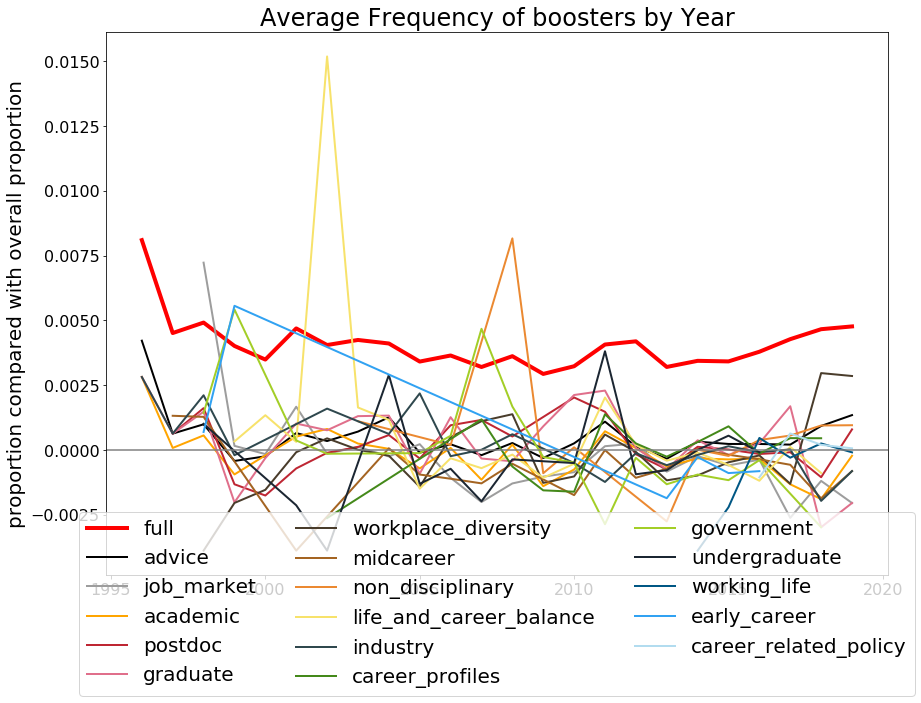

<Figure size 432x288 with 0 Axes>

In [35]:
plt.figure(figsize=(14, 10))

average_frequency_plot(full_df=full_df, full_plot=full_counts_b_plot_df, categories=categories, colors=colors, function="boosters", all_overall=all_overall_boosters)

plt.axhline(y=0, color="gray")
plt.title("Average Frequency of boosters by Year", fontsize=24)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.24), ncol=3, fontsize=20)
plt.xlabel('')
plt.ylabel('proportion compared with overall proportion', fontsize=20)
plt.tick_params(labelsize=16)
output_plot("../figs/boosters_all_category.png")
# plt.savefig("../figs/person_first_all_category.png")

<Figure size 864x576 with 0 Axes>

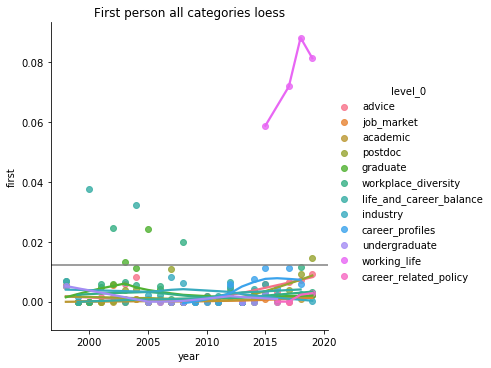

<Figure size 432x288 with 0 Axes>

In [107]:
def loess_plot(full_df, categories, function, all_overall):

    count=0
    pieces=[]
    used_cat = []

    plt.figure(figsize=(12, 8))


    for cat in categories:
        # print(cat)
        cat_df = full_df[full_df[cat] == "yes"]


        if function in ["first", "second"]:
            counts_df = clh.pronouns(cat_df)
        elif function == "modals":
            counts_df = clh.modals(cat_df)
        elif function == "hedges":
            counts_df = clh.hedges(cat_df, hedges="hedges")
        elif function == "boosters":
            counts_df = clh.hedges(cat_df,hedges="boosters")
        else:
            print("acceptable function arguments are: first, second, modals, hedges, boosters")
            # print(categories[count])
        # counts_df = clh.pronouns(cat_df)
        counts_df["frac"] = counts_df[function]/counts_df["wc"]
        counts_df[function] = counts_df["frac"]

        # remove data points that have been derived from fewer than 5 articles

        removals = []
        start_year = min(counts_df.year)
        end_year = max(counts_df.year)

        # print(start_year, end_year)

        for i in range(start_year,end_year):
            if len(counts_df[counts_df.year == i]) < 5:
                removals.append(i)
            # else:
                # print(cat, i)
        # print(len(counts_df))
        counts_df = counts_df[~counts_df["year"].isin(removals)]
        # print(len(counts_df))

        if (end_year-start_year) - len(removals) < (end_year-start_year)/2:
            # print(cat)
            # print(removals)
            continue 
        
        counts_plot_df = counts_df.groupby("year").median()
        counts_plot_df = counts_plot_df.reset_index()
        pieces.append(counts_plot_df)
        used_cat.append(cat)

        # sns.lmplot(x = "year", y = "frac1",lowess=True, data = counts_plot_df)
        # plt.title("first person "+categories[count])

        count+=1

    reg = pd.concat(pieces, keys=[cat for cat in used_cat])
    reg = reg.reset_index()
    sns.lmplot(x = "year", y = function ,lowess=True, hue="level_0", data = reg)
    plt.axhline(y=all_overall, color="gray")

loess_plot(full_df=full_df, categories=categories, function="first", all_overall=all_overall_first)
# sns.lmplot(x = "year", y = "first",lowess=True, data=full_counts_person_plot_df)

plt.title("First person all categories loess")

output_plot("../figs/person_first_all_category_loess.png")

<Figure size 864x576 with 0 Axes>

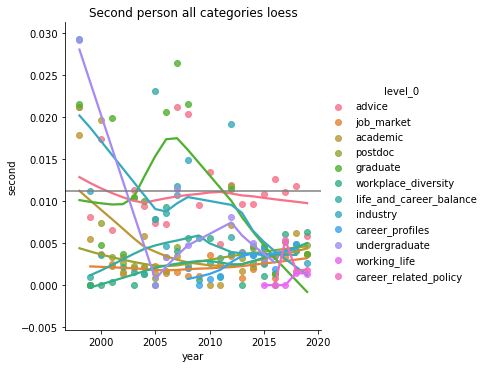

<Figure size 432x288 with 0 Axes>

In [108]:
loess_plot(full_df=full_df, categories=categories, function="second", all_overall=all_overall_second)
# sns.lmplot(x = "year", y = "second",  label="second", data=full_counts_person_plot_df)

plt.title("Second person all categories loess")

output_plot("../figs/person_second_all_category_loess.png")

midcareer
[1998, 1999, 2000, 2001, 2002, 2003, 2004, 2009, 2010, 2017, 2018]
non_disciplinary
[2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2015]
government
[1999, 2000, 2001, 2002, 2003, 2004, 2006, 2008, 2009, 2010, 2011, 2017]
early_career
[1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]


<Figure size 864x576 with 0 Axes>

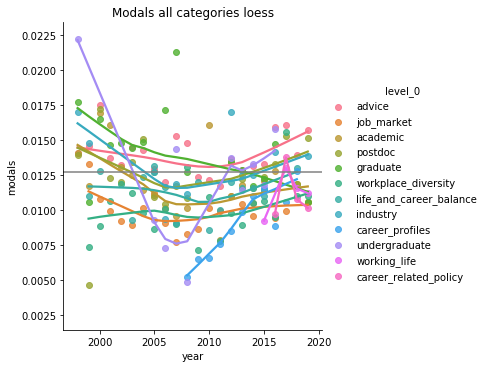

<Figure size 432x288 with 0 Axes>

In [76]:
loess_plot(full_df=full_df, categories=categories, function="modals", all_overall=all_overall_modal)

plt.title("Modals all categories loess")

output_plot("../figs/modals_all_category_loess.png")

midcareer
[1998, 1999, 2000, 2001, 2002, 2003, 2004, 2009, 2010, 2017, 2018]
non_disciplinary
[2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2015]
government
[1999, 2000, 2001, 2002, 2003, 2004, 2006, 2008, 2009, 2010, 2011, 2017]
early_career
[1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]


<Figure size 864x576 with 0 Axes>

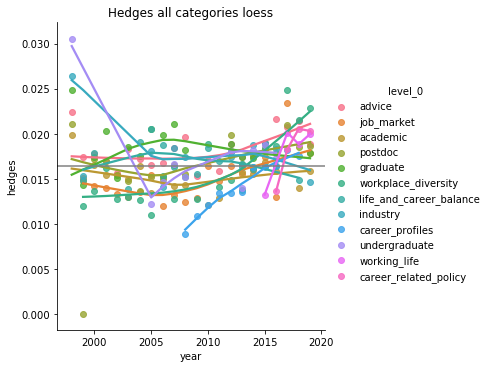

<Figure size 432x288 with 0 Axes>

In [90]:
loess_plot(full_df=full_df, categories=categories, function="hedges", all_overall=all_overall_hedges)

plt.title("Hedges all categories loess")

output_plot("../figs/hedges_all_category_loess.png")

midcareer
[1998, 1999, 2000, 2001, 2002, 2003, 2004, 2009, 2010, 2017, 2018]
non_disciplinary
[2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2015]
government
[1999, 2000, 2001, 2002, 2003, 2004, 2006, 2008, 2009, 2010, 2011, 2017]
early_career
[1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]


<Figure size 864x576 with 0 Axes>

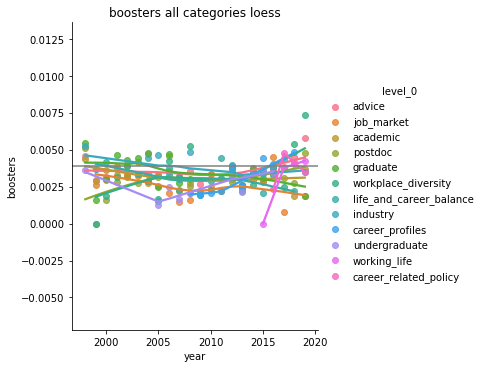

<Figure size 432x288 with 0 Axes>

In [78]:
loess_plot(full_df=full_df, categories=categories, function="boosters", all_overall=all_overall_boosters)

plt.title("boosters all categories loess")

output_plot("../figs/boosters_all_category_loess.png")

academic
postdoc
graduate
workplace_diversity
midcareer
non_disciplinary
life_and_career_balance
industry
career_profiles
government
undergraduate
early_career
career_related_policy


<Figure size 864x576 with 0 Axes>

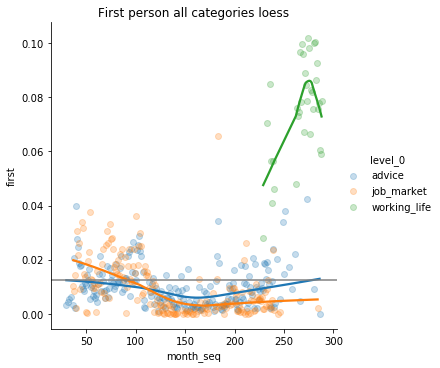

<Figure size 432x288 with 0 Axes>

In [101]:
def loess_month_plot(full_df, categories, function, all_overall):

    count=0
    pieces=[]
    used_cat = []

    plt.figure(figsize=(12, 8))


    for cat in categories:
        cat_df = full_df[full_df[cat] == "yes"]
            # print(categories[count])
        # counts_df = clh.pronouns(cat_df)
        if function in ["first", "second"]:
            counts_df = clh.pronouns(cat_df)
        elif function == "modals":
            counts_df = clh.modals(cat_df)
        elif function == "hedges":
            counts_df = clh.hedges(cat_df, hedges="hedges")
        elif function == "boosters":
            counts_df = clh.hedges(cat_df,hedges="boosters")
        else:
            print("acceptable function arguments are: first, second, modals, hedges, boosters")
        
        # remove data points that have been derived from fewer than 5 articles

        removals = []
        start_month = min(counts_df.month_seq)
        end_month = max(counts_df.month_seq)

        # print(start_year, end_year)

        for i in range(start_month,end_month):
            if len(counts_df[counts_df.month_seq == i]) < 3:
                # print(cat, i)
                removals.append(i)
        # print(len(counts_df))
        counts_df = counts_df[~counts_df["month_seq"].isin(removals)]
        # print(len(counts_df))

        if  (end_month-start_month) - len(removals) < (end_month-start_month)/2:
            print(cat)
            # print(removals)
            continue 

        counts_df = counts_df.groupby("month_seq").mean()

        counts_df["inc1"] = counts_df[function]/counts_df["wc"]
        counts_df[function] = counts_df["inc1"]
        
        counts_plot_df = counts_df.reset_index()
        pieces.append(counts_plot_df)

        # sns.lmplot(x = "year", y = "frac1",lowess=True, data = counts_plot_df)
        # plt.title("first person "+categories[count])

        used_cat.append(cat)
        count+=1

    reg = pd.concat(pieces, keys=[cat for cat in used_cat])
    reg = reg.reset_index()
    # reg
    sns.lmplot(x = "month_seq", y = function, lowess=True, hue="level_0",scatter_kws={'alpha':0.25}, data = reg)
    plt.axhline(y=all_overall, color="gray")

loess_month_plot(full_df=full_df, categories=categories, function="first", all_overall=all_overall_first)

plt.title("First person all categories loess")

output_plot("../figs/person_all_category_loess_month_3.png")

academic
postdoc
graduate
workplace_diversity
midcareer
non_disciplinary
life_and_career_balance
industry
career_profiles
government
undergraduate
early_career
career_related_policy


<Figure size 864x576 with 0 Axes>

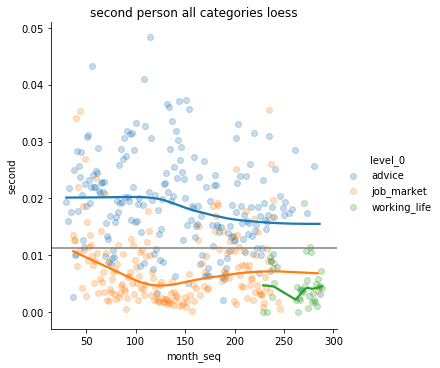

<Figure size 432x288 with 0 Axes>

In [97]:
loess_month_plot(full_df=full_df, categories=categories, function="second", all_overall=all_overall_second)

plt.title("second person all categories loess")

output_plot("../figs/second_category_loess_month_3.png")

academic
postdoc
graduate
workplace_diversity
midcareer
non_disciplinary
life_and_career_balance
industry
career_profiles
government
undergraduate
early_career
career_related_policy


<Figure size 864x576 with 0 Axes>

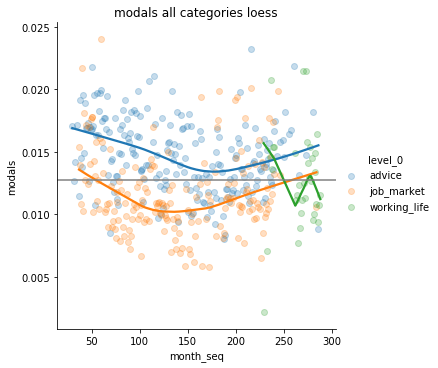

<Figure size 432x288 with 0 Axes>

In [98]:
loess_month_plot(full_df=full_df, categories=categories, function="modals", all_overall=all_overall_modal)

plt.title("modals all categories loess")

output_plot("../figs/modals_category_loess_month_3.png")

academic
postdoc
graduate
workplace_diversity
midcareer
non_disciplinary
life_and_career_balance
industry
career_profiles
government
undergraduate
early_career
career_related_policy


<Figure size 864x576 with 0 Axes>

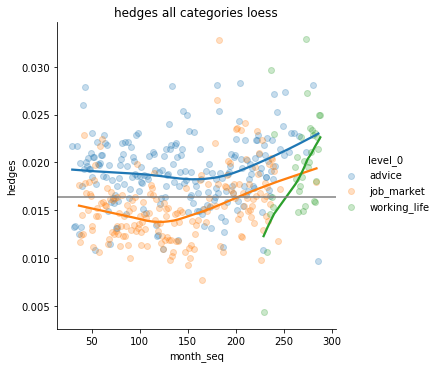

<Figure size 432x288 with 0 Axes>

In [99]:
loess_month_plot(full_df=full_df, categories=categories, function="hedges", all_overall=all_overall_hedges)

plt.title("hedges all categories loess")

output_plot("../figs/hedges_category_loess_month_3.png")

academic
postdoc
graduate
workplace_diversity
midcareer
non_disciplinary
life_and_career_balance
industry
career_profiles
government
undergraduate
early_career
career_related_policy


<Figure size 864x576 with 0 Axes>

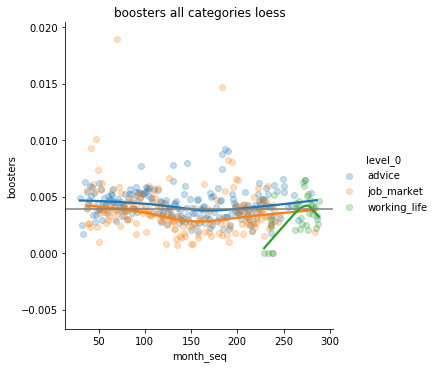

<Figure size 432x288 with 0 Axes>

In [100]:
loess_month_plot(full_df=full_df, categories=categories, function="boosters", all_overall=all_overall_boosters)

plt.title("boosters all categories loess")

output_plot("../figs/boosters_category_loess_month_3.png")